In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'medicalcosts'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
insurance_df = pd.read_sql_query('select * from medicalcosts',con=engine)
engine.dispose()

insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.90
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.50
4,32,male,28.880,0,no,northwest,3866.86
5,31,female,25.740,0,no,southeast,3756.62
6,46,female,33.440,1,no,southeast,8240.59
7,37,female,27.740,3,no,northwest,7281.51
8,37,male,29.830,2,no,northeast,6406.41
9,60,female,25.840,0,no,northwest,28923.10


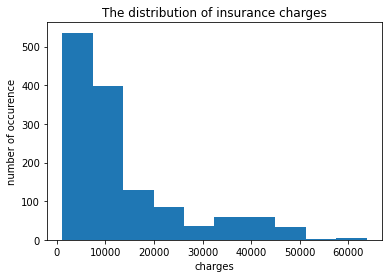

In [4]:
plt.hist(insurance_df.charges)
plt.title("The distribution of insurance charges")
plt.xlabel("charges")
plt.ylabel("number of occurence")
plt.show()

In [5]:
insurance_df["is_male"] = pd.get_dummies(insurance_df.sex,drop_first=True)
insurance_df["is_smoker"] = pd.get_dummies(insurance_df.smoker,drop_first=True)

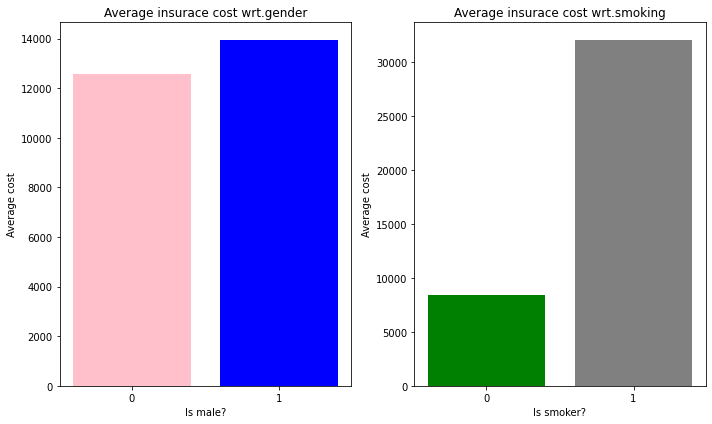

In [6]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

plt.bar(insurance_df.groupby("is_male")["charges"].mean().index, insurance_df.groupby("is_male")["charges"].mean(),  color=("pink","blue") )
plt.title("Average insurace cost wrt.gender")
plt.ylabel("Average cost")
plt.xlabel("Is male?")
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(insurance_df.groupby("is_smoker")["charges"].mean().index, insurance_df.groupby("is_smoker")["charges"].mean(), color=("green","grey"))
plt.title("Average insurace cost wrt.smoking")
plt.ylabel("Average cost")
plt.xlabel("Is smoker?")
plt.xticks([0,1])

plt.tight_layout()
plt.show()

In [7]:
Y = insurance_df['charges']
X = insurance_df[['is_male', 'is_smoker']]

lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

print('\nCoeficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)



Coeficients: 
 [  -65.37868556 23622.13598049]

Intercept: 
 8466.035592512446


In [8]:
!pip install statsmodels

In [9]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1088.
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          4.78e-281
Time:                        05:19:22   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1335   BIC:                         2.768e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8466.0356    303.541     27.891      0.000    7870.566    9061.506
is_male      -65.3787    409.809     -0.160      0.873    -869.318     738.561
is_smoker   2.362e+04    507.736     46.524      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.842   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.897
Skew:                           0.727   Prob(JB):                     9.71e-47
Kurtosis:                       4.299   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""